# Mental Health Data Analysis

## Import data and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sqlalchemy import text,create_engine

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-talk')


In [6]:
user = 'root'
password = '7003890541'
host = 'localhost'
port = '3306'
database = 'mental_health_final_project'

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")


In [7]:
def sql(query,engine = engine):
    return pd.read_sql(query,engine)

In [8]:
query = '''
    select * from data
    limit 5;    
'''
sql(query)

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
0,female,united states,corporate,unknown,no,yes,<15 days,yes,no,yes,medium,no,no,yes,no,not sure
1,female,united states,corporate,unknown,yes,yes,<15 days,yes,no,yes,medium,no,no,yes,no,no
2,female,united states,corporate,unknown,yes,yes,<15 days,yes,no,yes,medium,no,no,yes,no,yes
3,female,united states,corporate,no,yes,yes,<15 days,yes,no,yes,medium,no,no,yes,maybe,yes
4,female,united states,corporate,no,yes,yes,<15 days,yes,no,yes,medium,no,no,yes,no,yes


In [15]:
query = '''
    select column_name from information_schema.columns
    where table_schema = database()
    and table_name = 'data'
'''
all_cols = [col[0] for col in sql(query).values.tolist()]
all_cols

['care_options',
 'changes_habits',
 'coping_struggles',
 'country',
 'days_indoors',
 'family_history',
 'gender',
 'growing_stress',
 'mental_health_history',
 'mental_health_interview',
 'mood_swings',
 'occupation',
 'self_employed',
 'social_weakness',
 'treatment',
 'work_interest']

## Univariate Analysis

Column : care_options


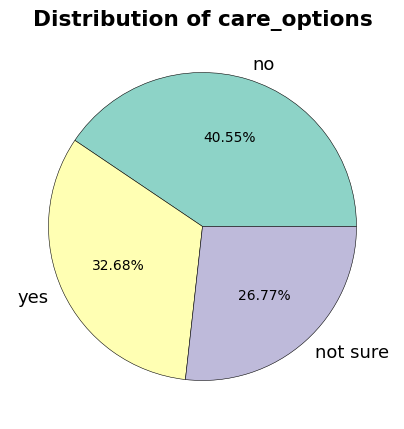

Column : changes_habits


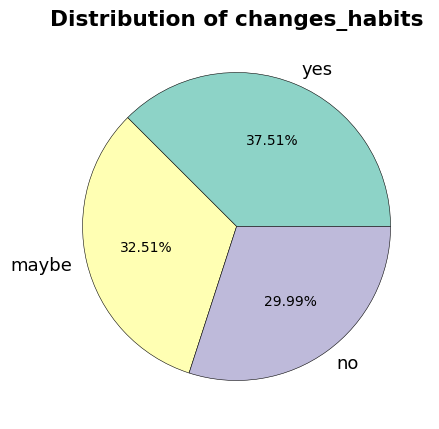

Column : coping_struggles


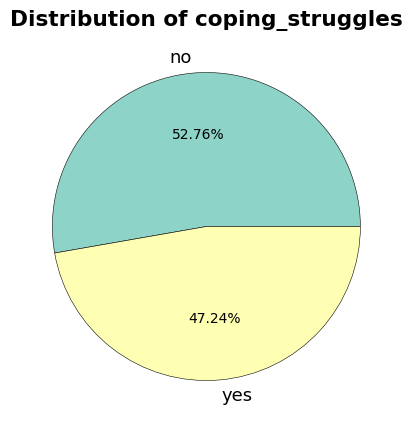

Column : days_indoors


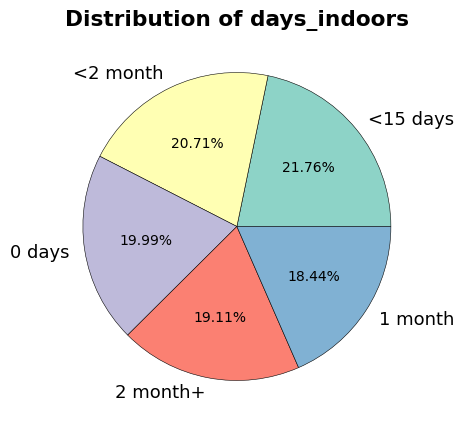

Column : family_history


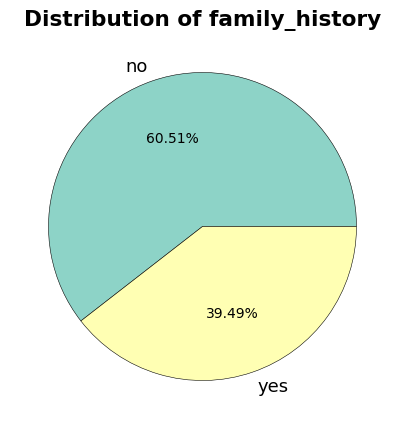

Column : gender


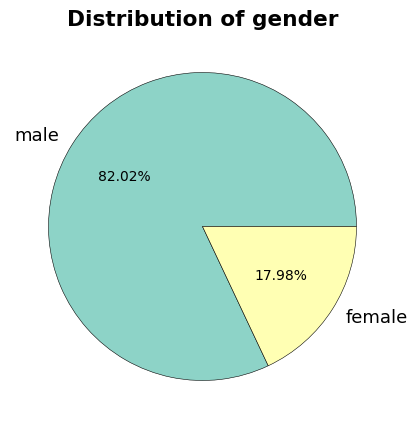

Column : growing_stress


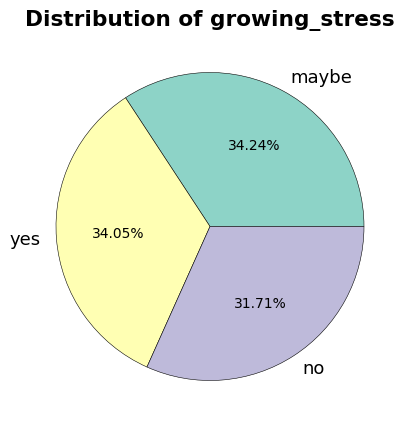

Column : mental_health_history


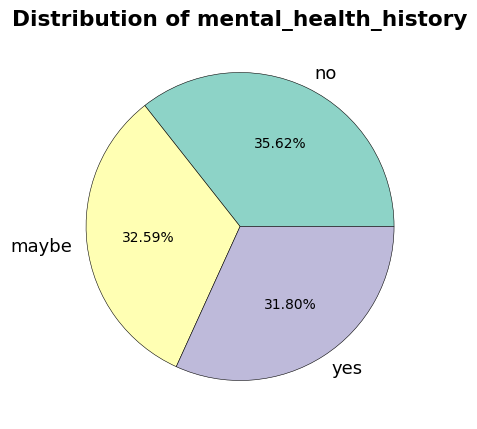

Column : mental_health_interview


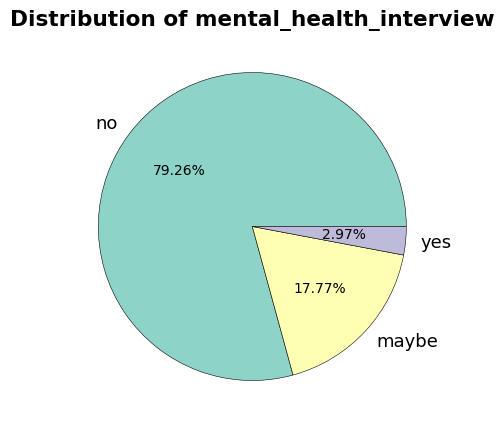

Column : mood_swings


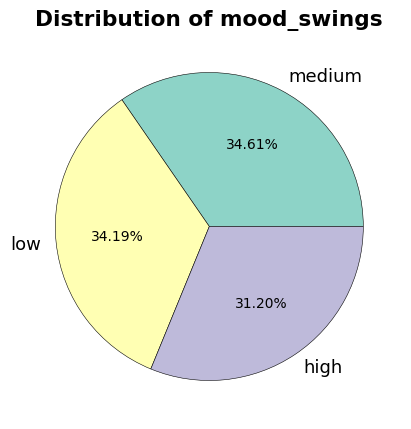

Column : occupation


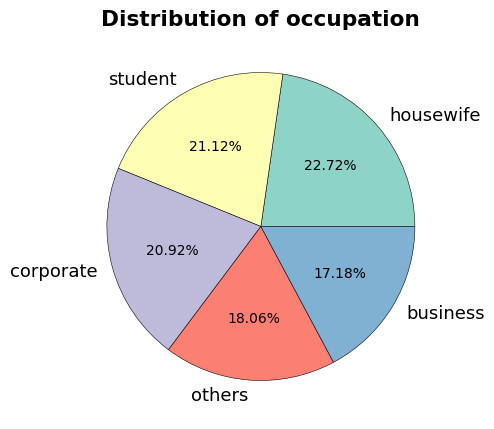

Column : self_employed


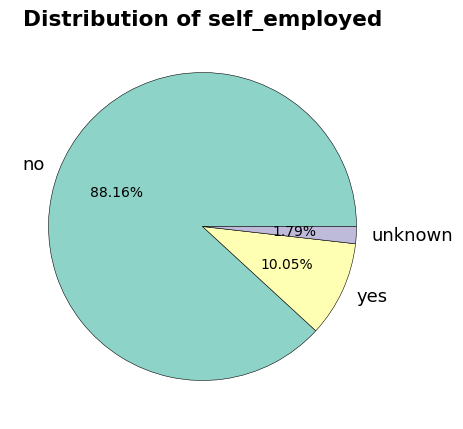

Column : social_weakness


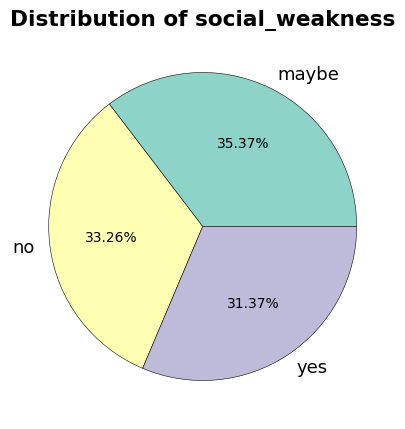

Column : treatment


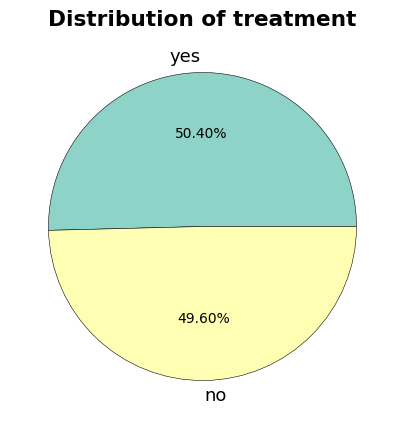

Column : work_interest


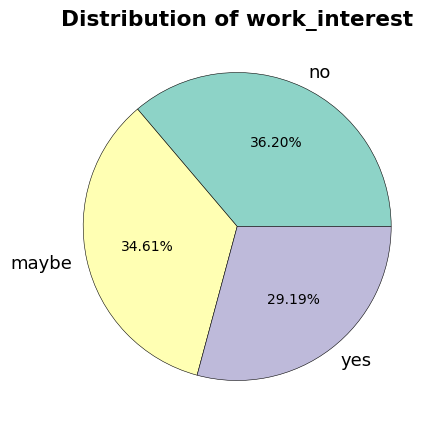

In [25]:
for col in all_cols:
    query = f'''
        select {col},
        round(100*(count(*)/(select count(*) from data)),2) as percentage
        from data
        group by {col}
        order by percentage desc
    '''
    print(f"Column : {col}")
    val = sql(query)
    plt.figure(figsize=(5,5))
    plt.pie(val['percentage'],labels=val[col].tolist(),
            autopct="%.2f%%",colors=plt.cm.Set3.colors,wedgeprops={'edgecolor':'black'})
    plt.title(f'Distribution of {col}',weight= 'bold')
    plt.show()


## Multivariate analysis with care_option column

Column name: changes_habits


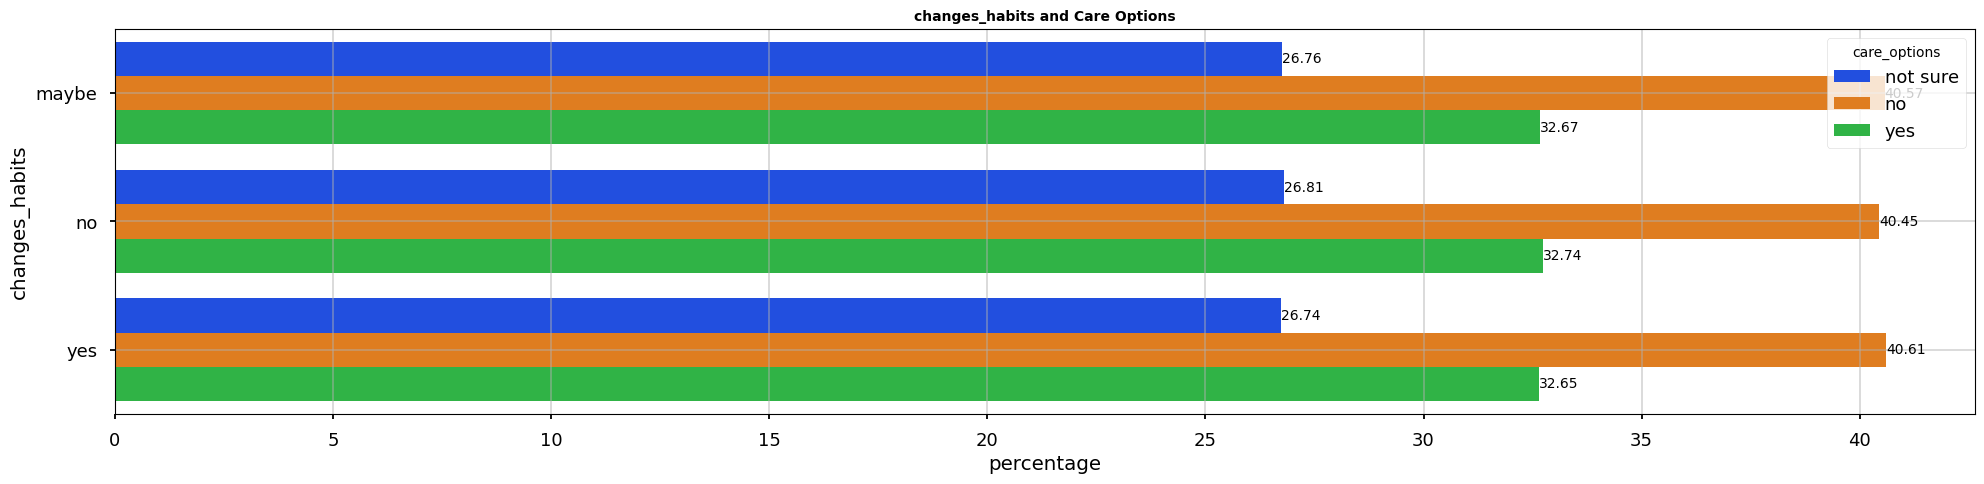

------------------------------
Column name: coping_struggles


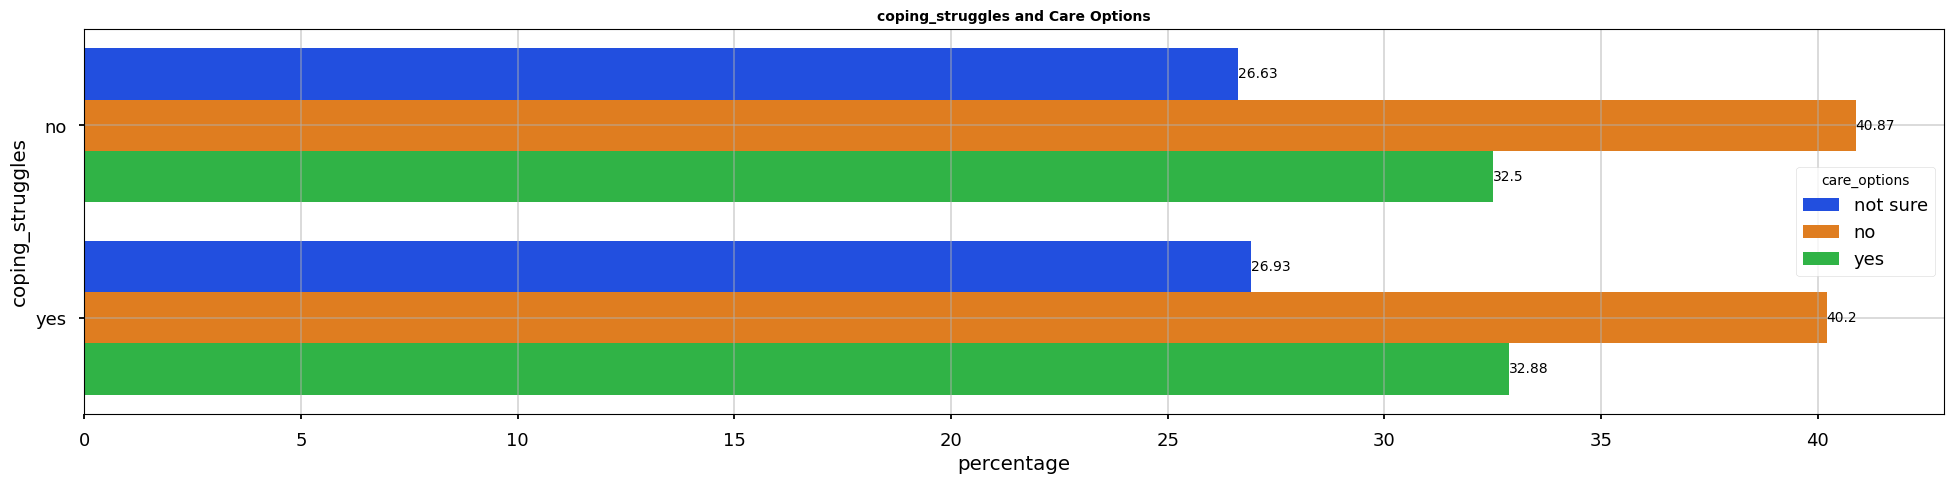

------------------------------
Column name: days_indoors


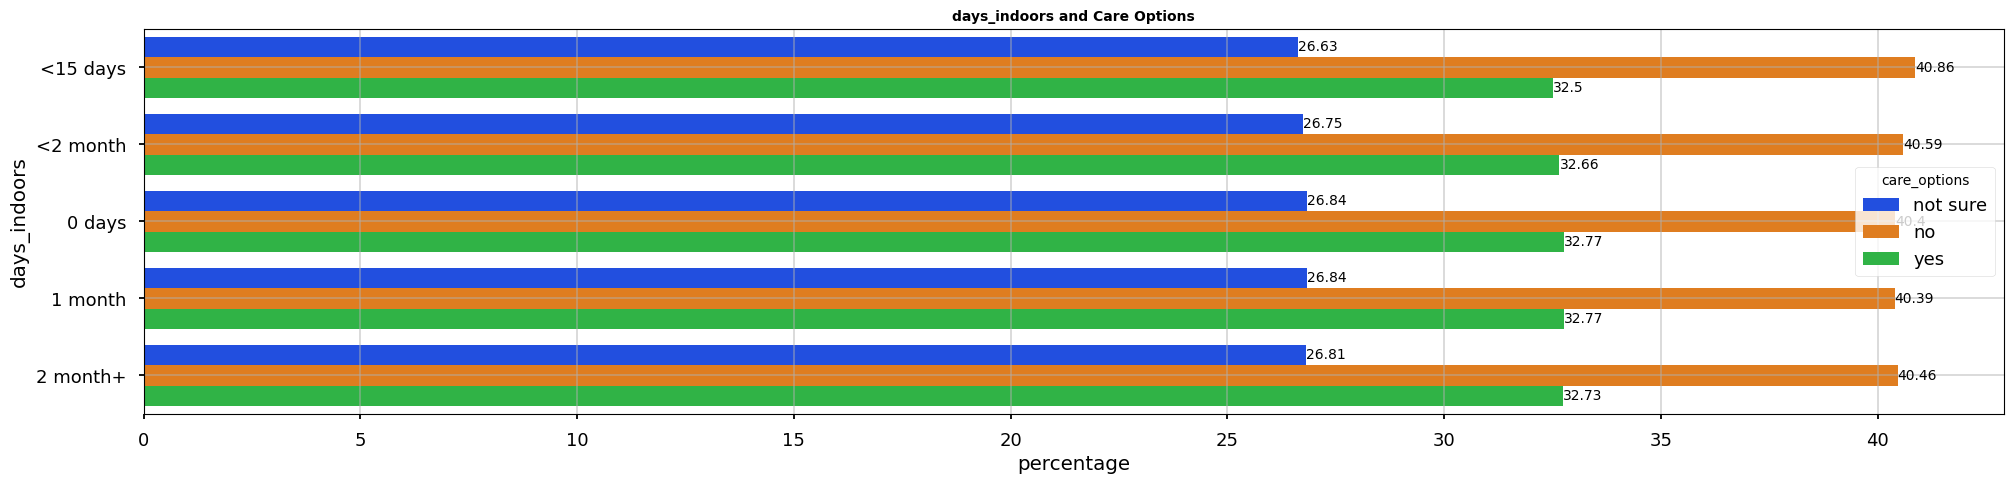

------------------------------
Column name: family_history


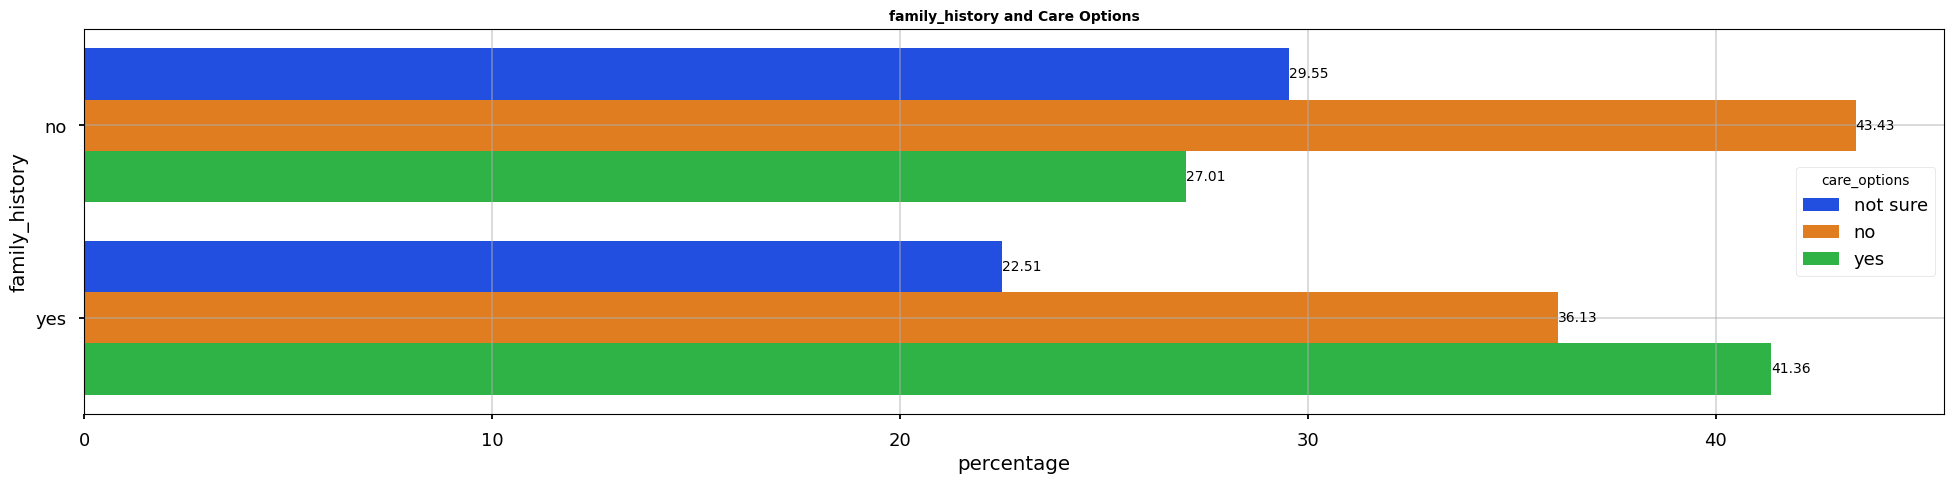

------------------------------
Column name: gender


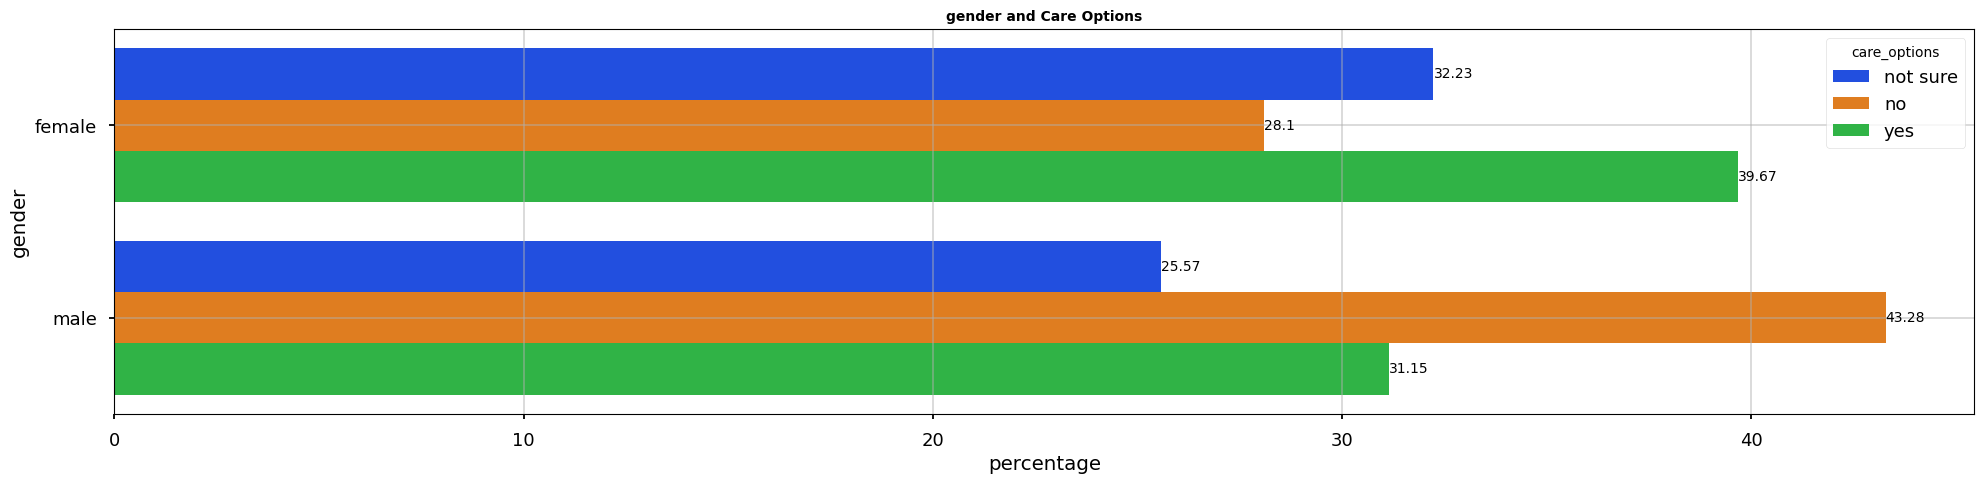

------------------------------
Column name: growing_stress


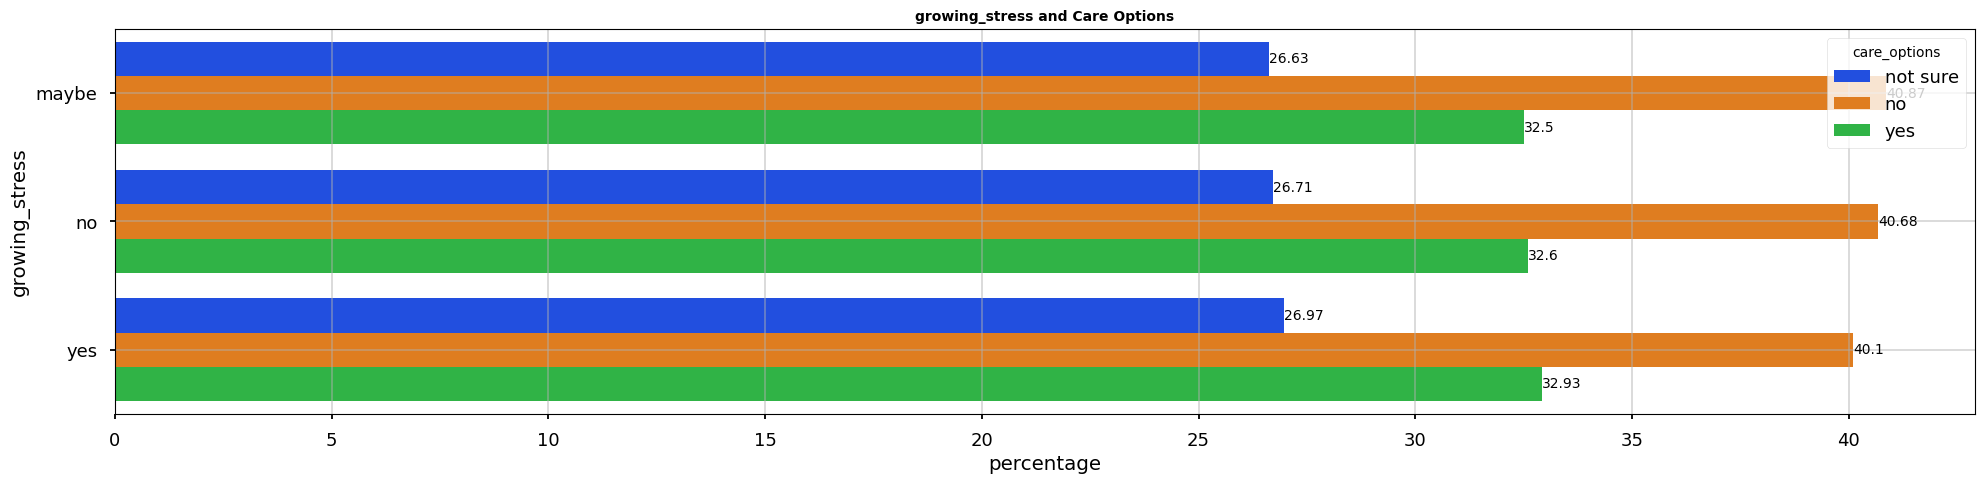

------------------------------
Column name: mental_health_history


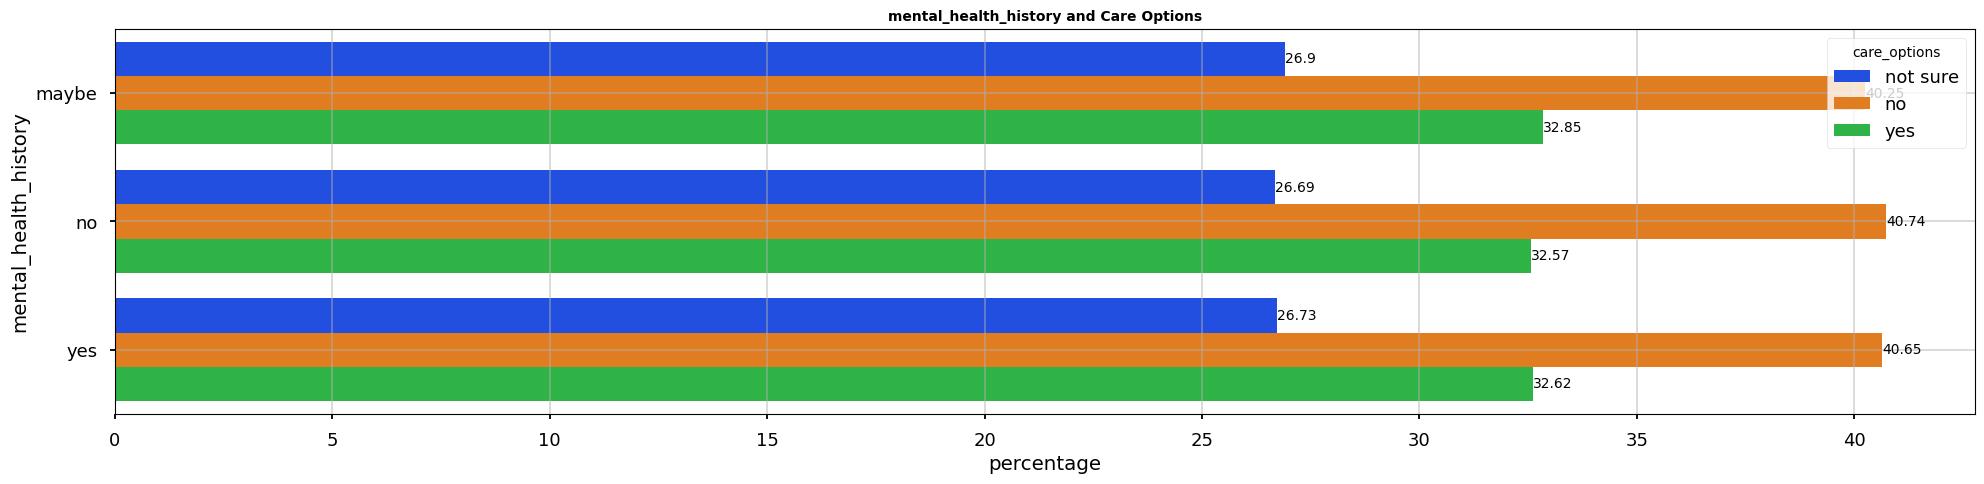

------------------------------
Column name: mental_health_interview


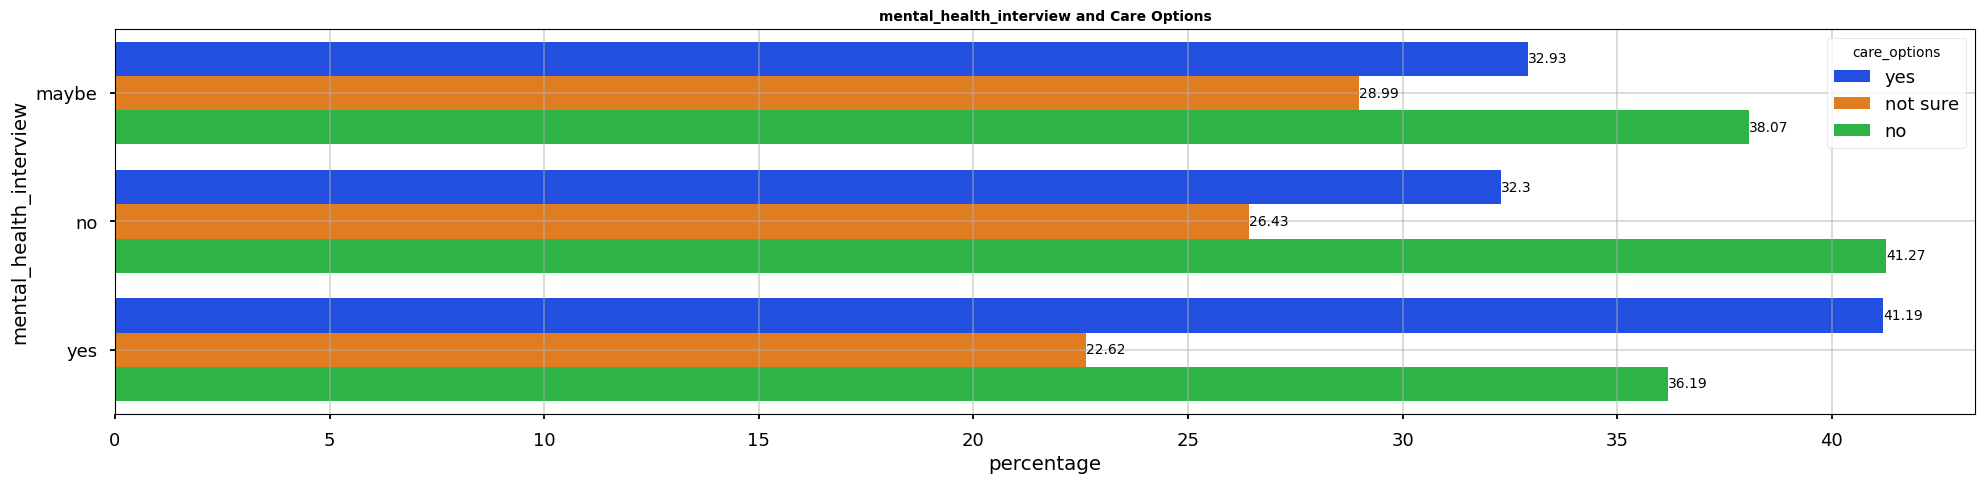

------------------------------
Column name: mood_swings


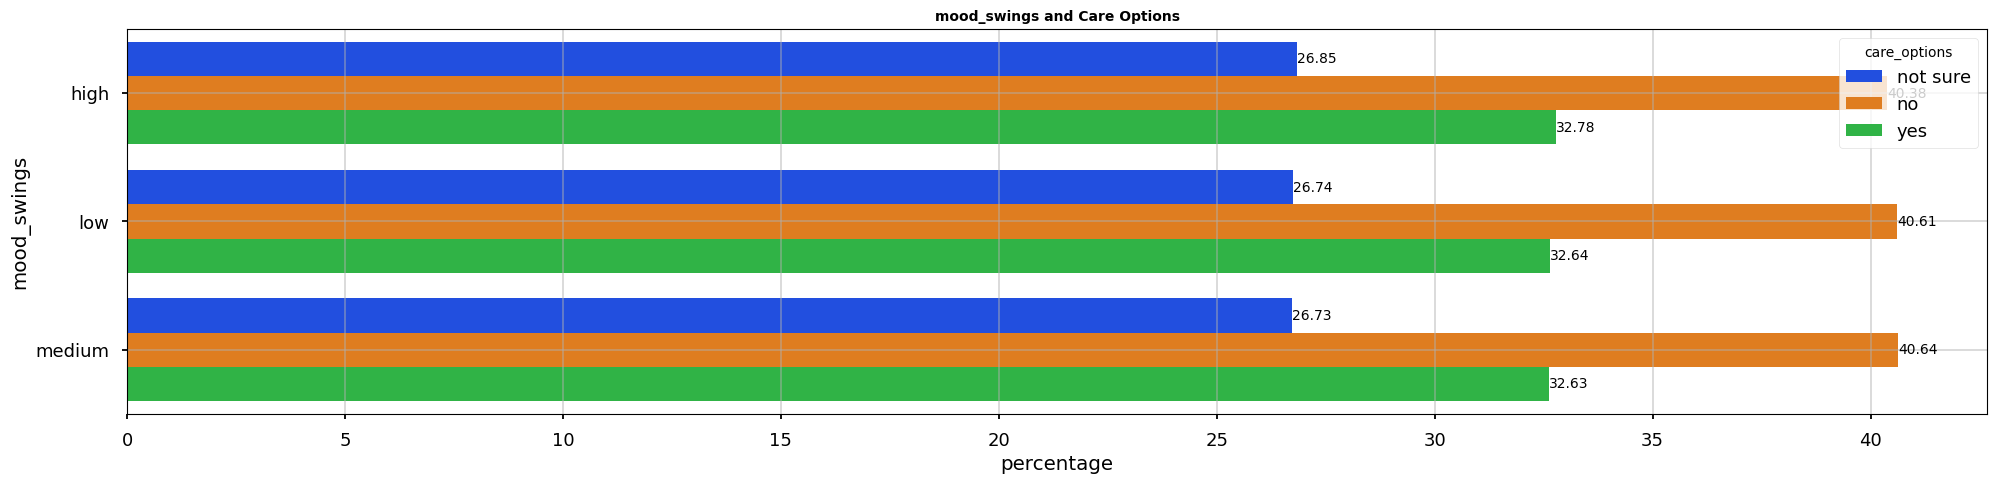

------------------------------
Column name: occupation


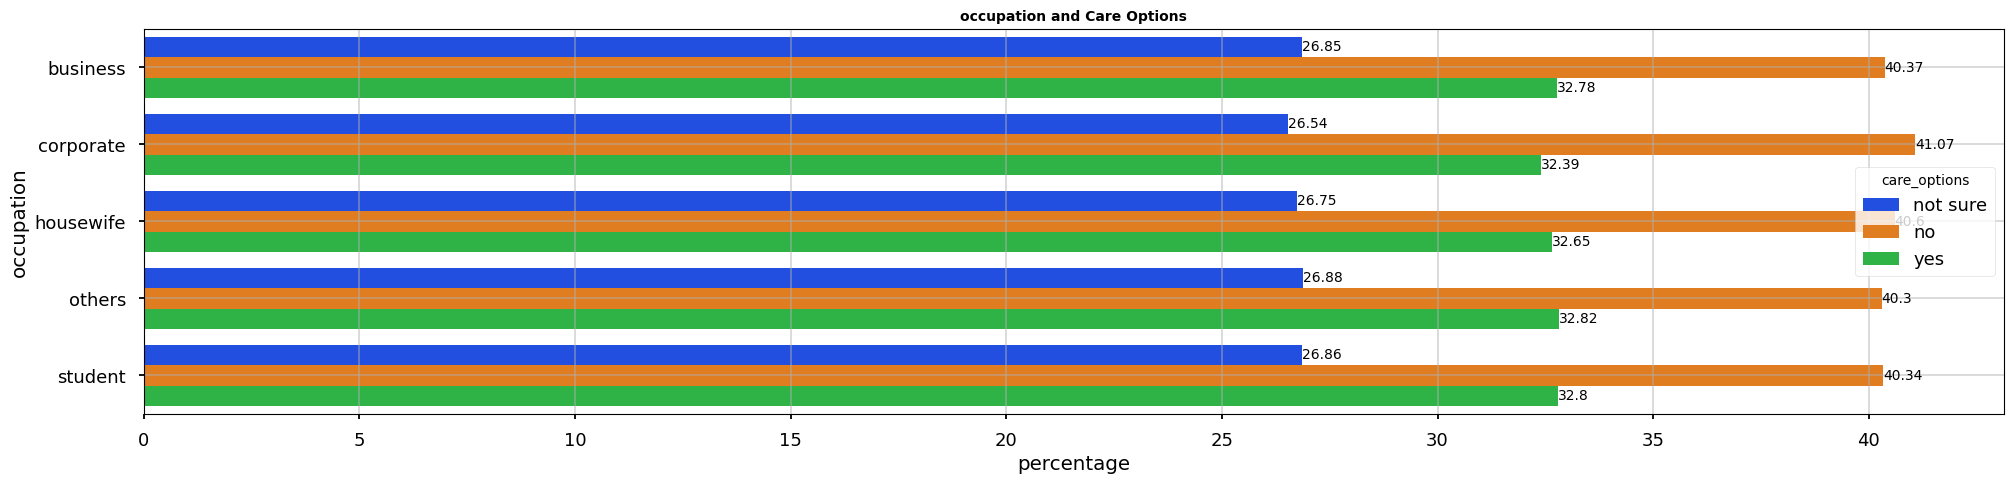

------------------------------
Column name: self_employed


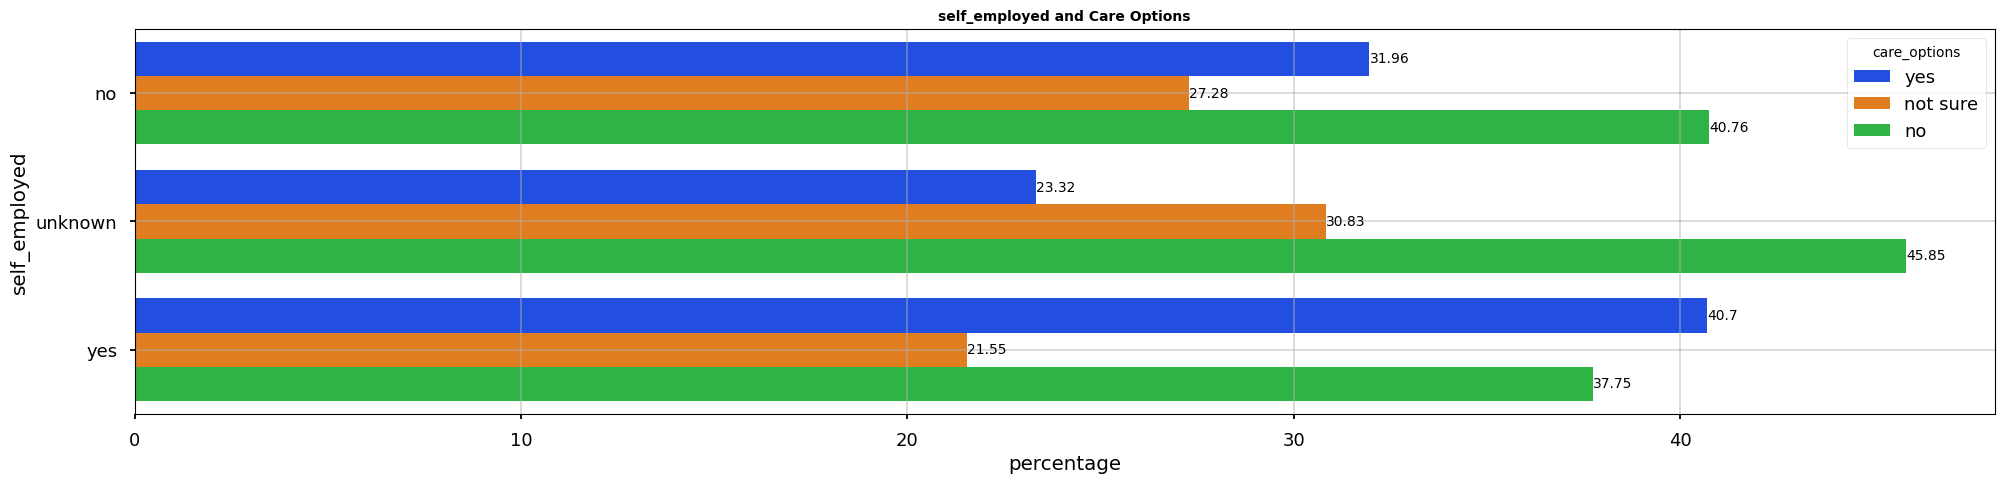

------------------------------
Column name: social_weakness


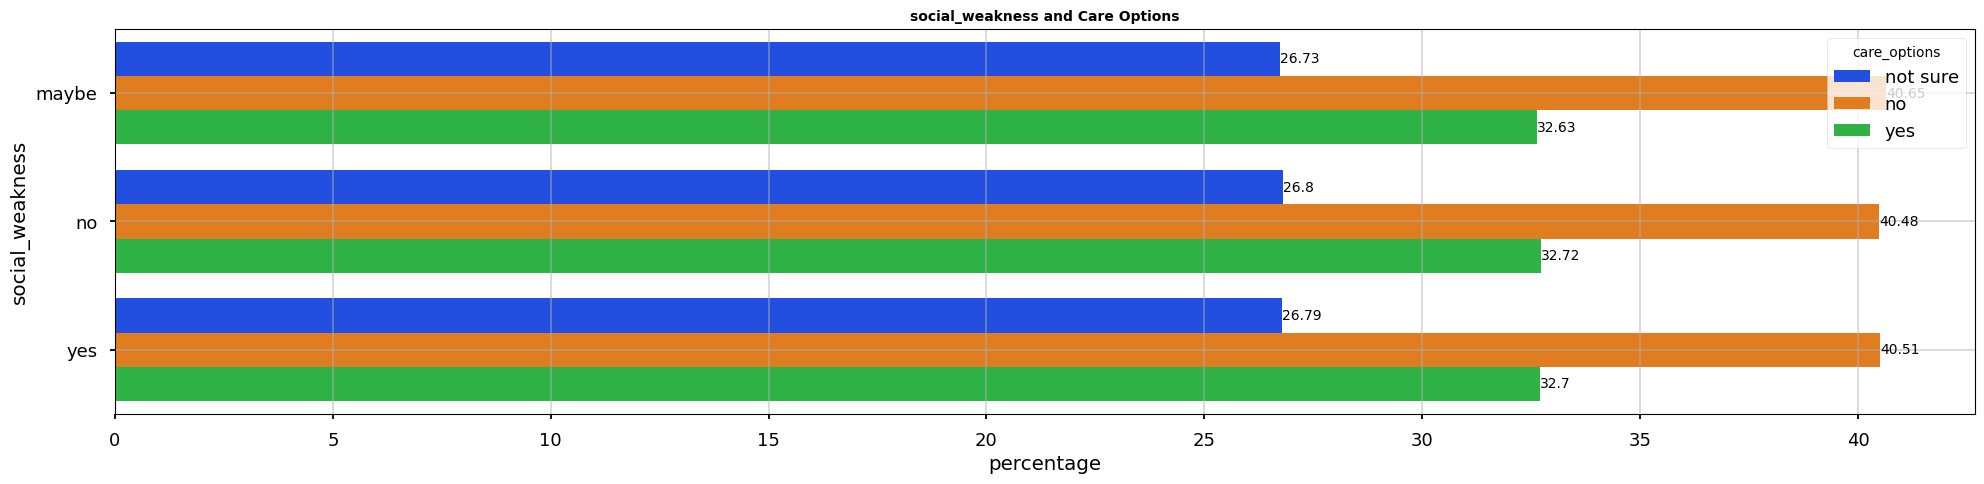

------------------------------
Column name: treatment


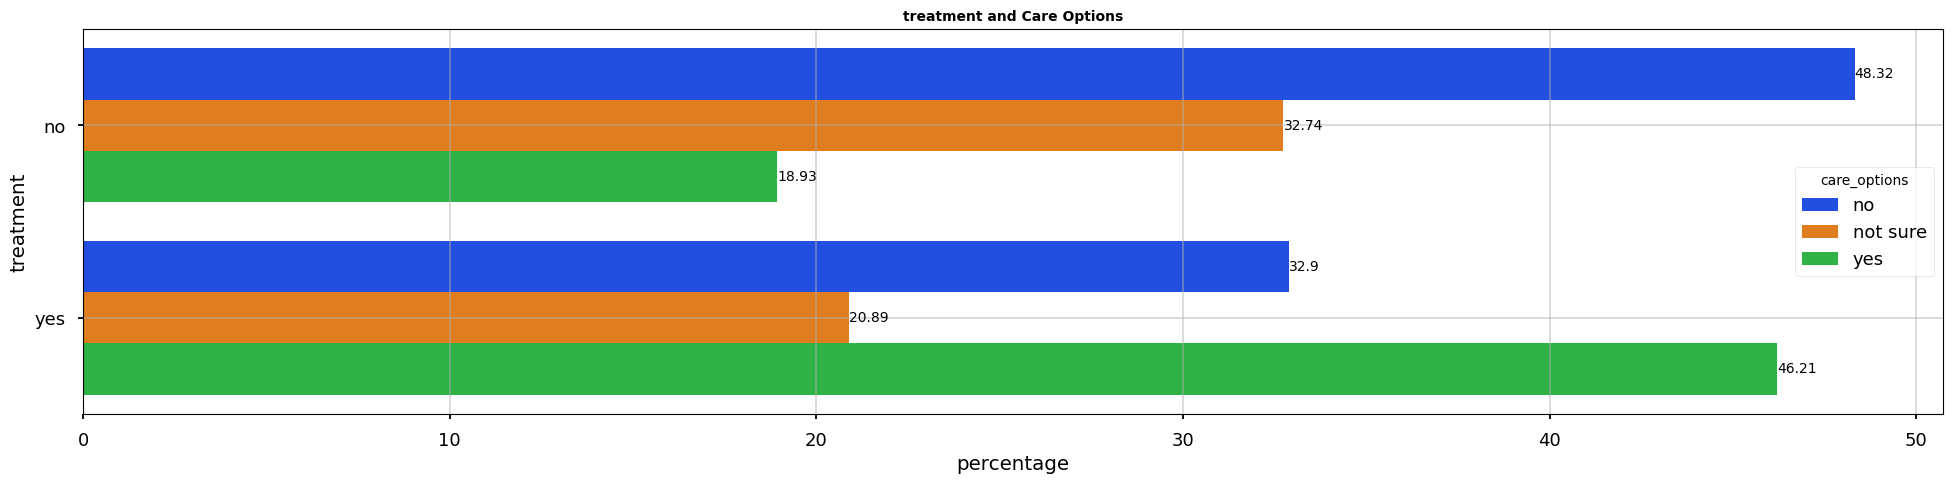

------------------------------
Column name: work_interest


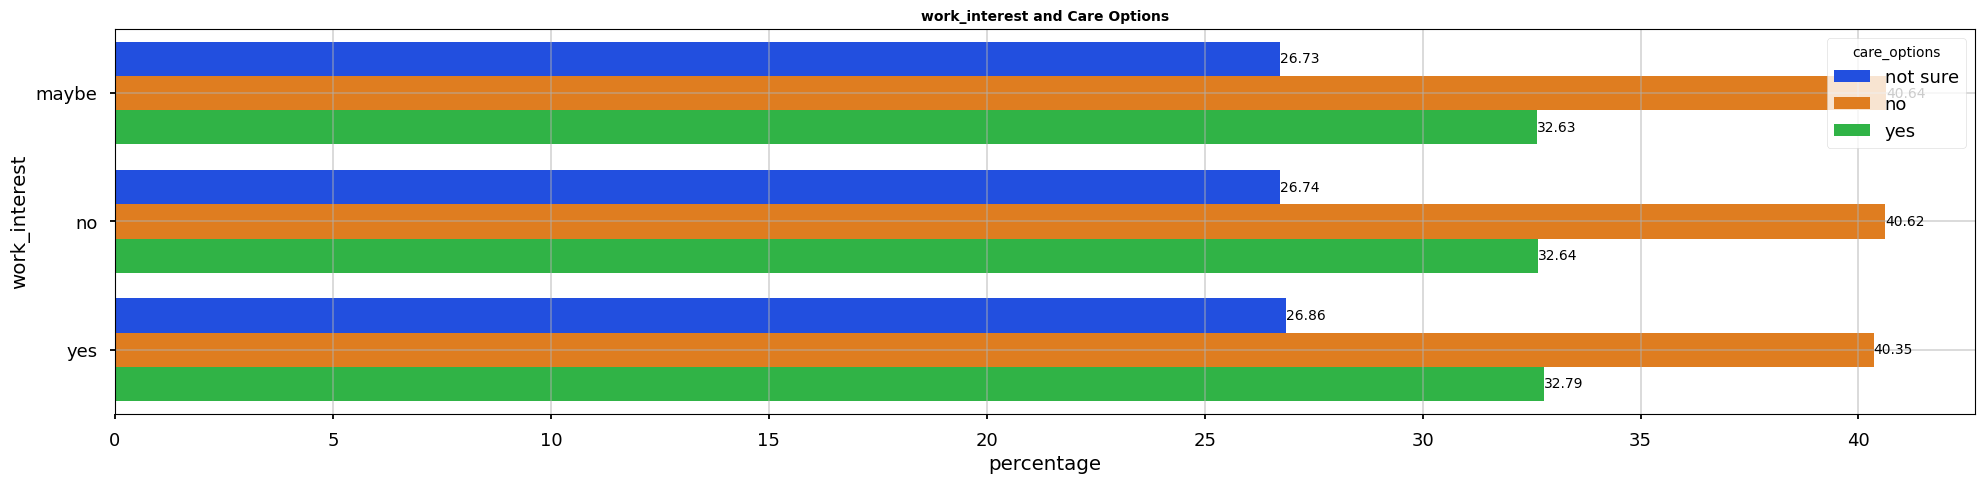

------------------------------


In [37]:
for col in all_cols[1:]:
    query = f'''
        select {col},
        care_options,
        round(100*(count(*)/sum(count(*)) over(partition by {col})),2) as percentage
        from data
        group by {col},care_options;
    '''
    print(f"Column name: {col}")
    val = sql(query)
    plt.figure(figsize=(24,5))
    ax=sns.barplot(y=col,
                   hue='care_options',
                   x='percentage',
                   data=val,
                   palette=sns.color_palette('bright', n_colors=6)
                   ,orient='h')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'{col} and Care Options',fontsize=10,weight = 'bold')
    plt.grid(alpha = 0.5)
    plt.show()
    print("-"*30)

## Bivariate analysis including care option column

In [39]:
query = '''
    select * from data
    where care_options = 'yes'
'''
yes_care_option = sql(query)

In [40]:
query = '''
    select * from data
    where care_options = 'no'
'''
no_care_option = sql(query)

In [62]:
query = '''
    select * from data
    where care_options = 'not sure'
'''
not_sure_care_option = sql(query)

### Treatment + Family History + Care Option

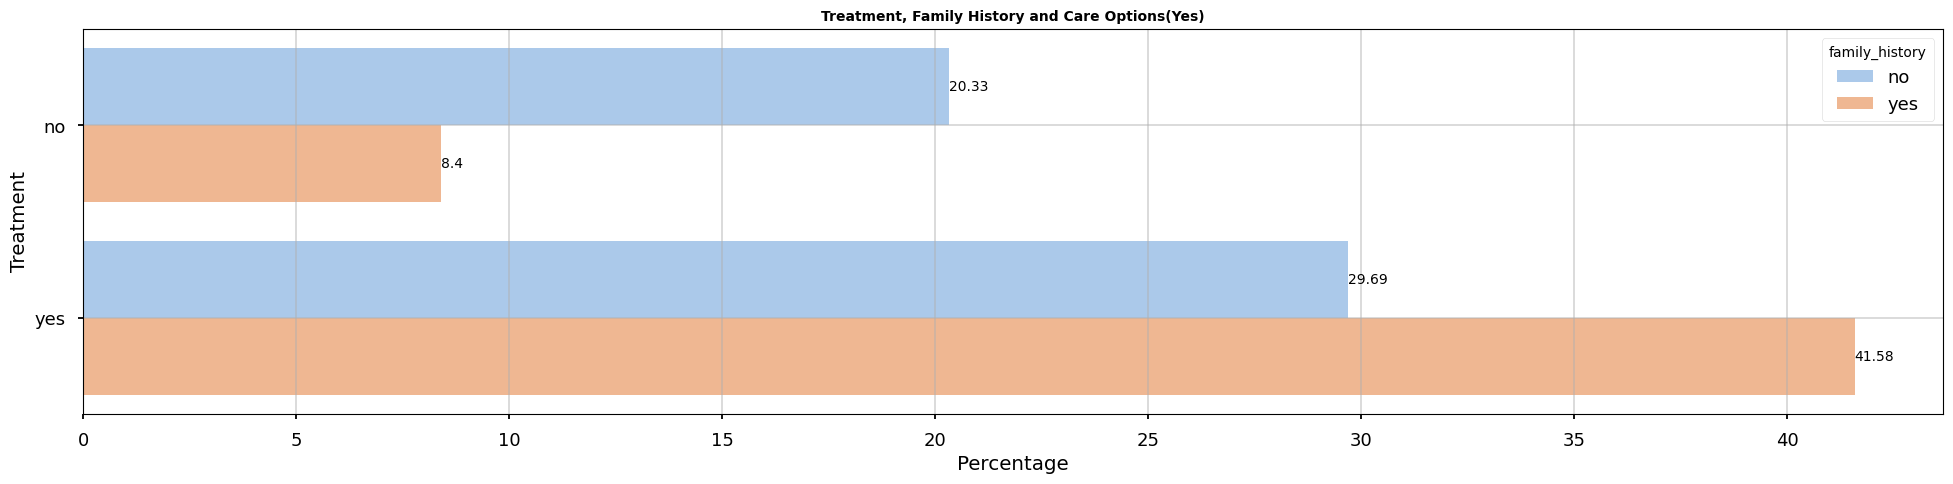

In [65]:
temp = (yes_care_option[['treatment','family_history']].groupby(['treatment','family_history']).
 size()/len(yes_care_option)*100).round(2).reset_index(name = 'percentage')

plt.figure(figsize=(24,5))
ax=sns.barplot(y='treatment',
                hue='family_history',
                data=temp,
                x='percentage',
                palette='pastel',
                orient='h')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Treatment, Family History and Care Options(Yes)',fontsize=10,weight = 'bold')
plt.ylabel('Treatment')
plt.xlabel('Percentage')
plt.grid(alpha = 0.5)
plt.show()

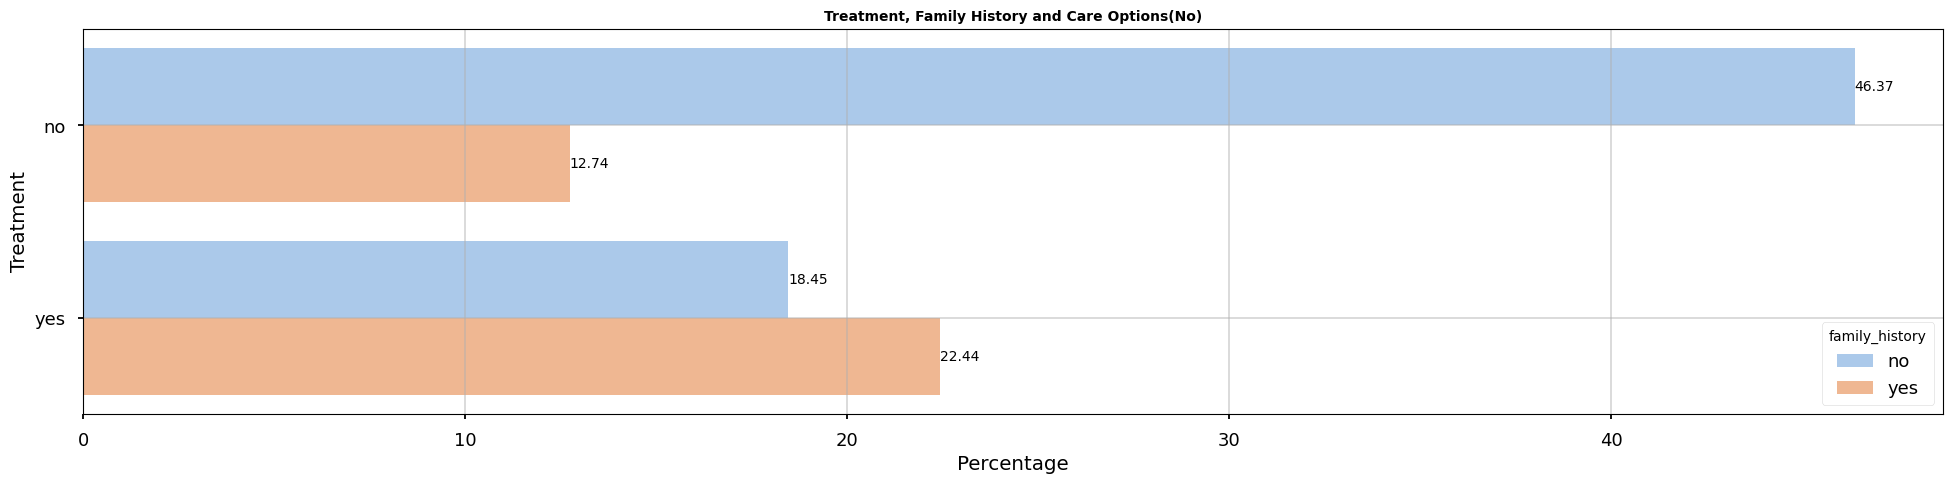

In [60]:
temp = (no_care_option[['treatment','family_history']].groupby(['treatment','family_history']).
 size()/len(no_care_option)*100).round(2).reset_index(name = 'percentage')

plt.figure(figsize=(24,5))
ax=sns.barplot(y='treatment',
                hue='family_history',
                data=temp,
                x='percentage',
                palette='pastel',
                orient='h')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Treatment, Family History and Care Options(No)',fontsize=10,weight = 'bold')
plt.ylabel('Treatment')
plt.xlabel('Percentage')
plt.grid(alpha = 0.5)
plt.show()

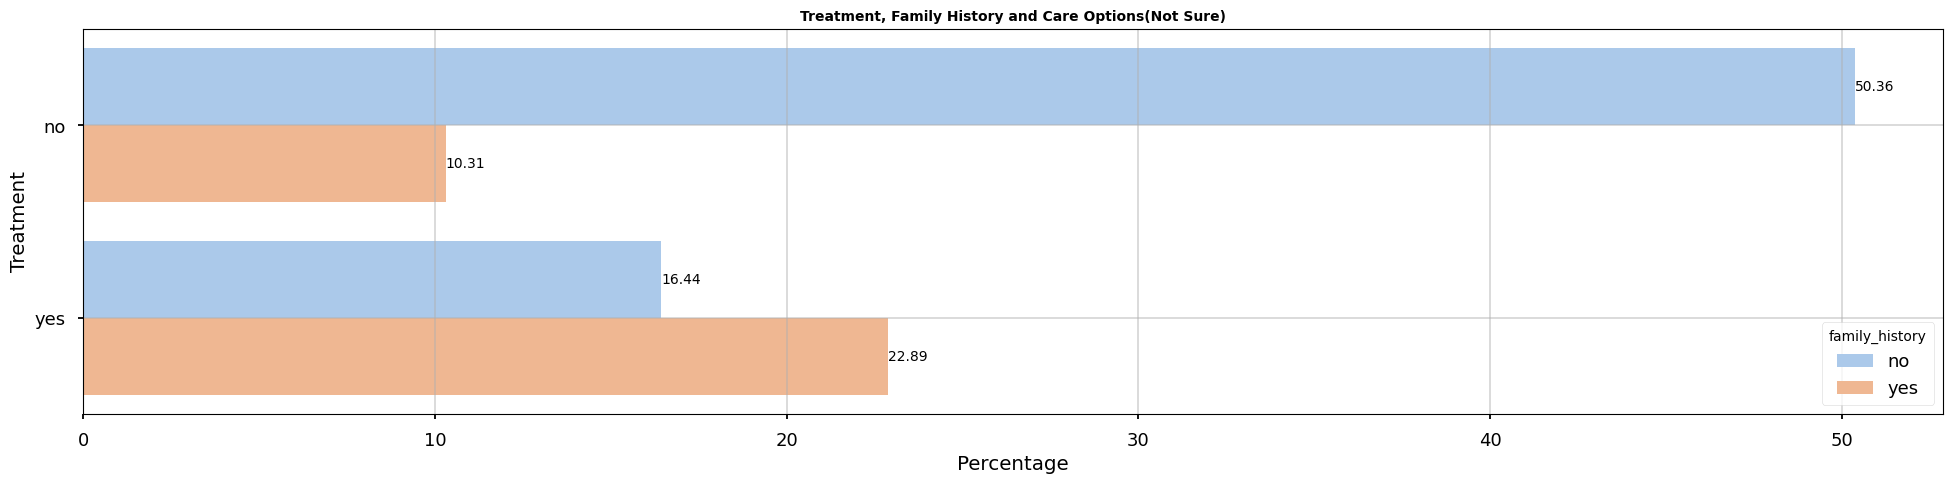

In [63]:
temp = (not_sure_care_option[['treatment','family_history']].groupby(['treatment','family_history']).
 size()/len(not_sure_care_option)*100).round(2).reset_index(name = 'percentage')

plt.figure(figsize=(24,5))
ax=sns.barplot(y='treatment',
                hue='family_history',
                data=temp,
                x='percentage',
                palette='pastel',
                orient='h')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Treatment, Family History and Care Options(Not Sure)',fontsize=10,weight = 'bold')
plt.ylabel('Treatment')
plt.xlabel('Percentage')
plt.grid(alpha = 0.5)
plt.show()

### Gender + Mental Health Interview + Care Option

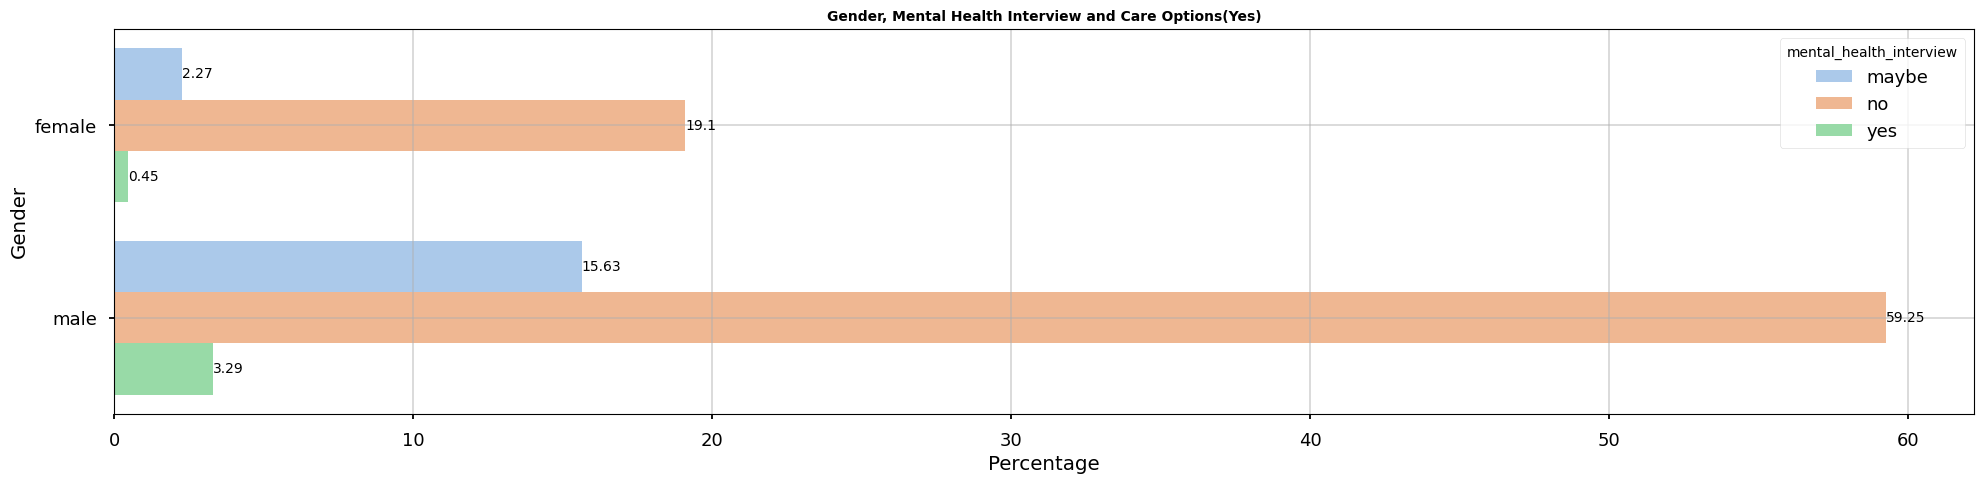

In [66]:
temp = (yes_care_option[['gender','mental_health_interview']].groupby(['gender','mental_health_interview']).
 size()/len(yes_care_option)*100).round(2).reset_index(name = 'percentage')

plt.figure(figsize=(24,5))
ax=sns.barplot(y='gender',
                hue='mental_health_interview',
                data=temp,
                x='percentage',
                palette='pastel',
                orient='h')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender, Mental Health Interview and Care Options(Yes)',fontsize=10,weight = 'bold')
plt.ylabel('Gender')
plt.xlabel('Percentage')
plt.grid(alpha = 0.5)
plt.show()